In [1]:
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Use CPU
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

path = '/notebook/CJ/'
HOME_DIR = path+'fed_detect/'
VAL_DIR = HOME_DIR+'fr_graphics/valid/'
RESULTS_DIR = HOME_DIR+'fr_graphics/results/'

# Load a compiled model
loaded_model = load_model(os.path.join(RESULTS_DIR,'pt_dr_conv_model.h5'))

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Found 767 images belonging to 7 classes.


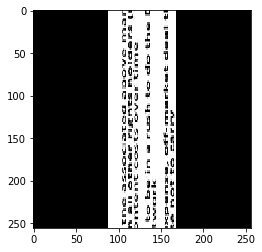

Actual class: text
Predicted class: tables


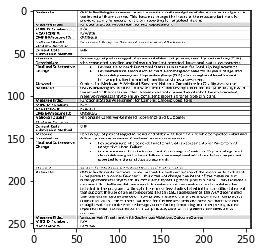

Actual class: tables
Predicted class: tables


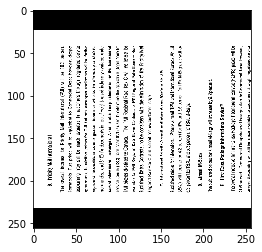

Actual class: text
Predicted class: text


In [3]:
input_shape = (256,256,3)

# Rescale images by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    VAL_DIR,
    shuffle=True, # 
    target_size=input_shape[:-1],
    batch_size=1,
    class_mode='categorical'
    )

for i in range(0, 3):

    # Test out classifier
    inverted_dict = dict([[v,k] for k,v in test_generator.class_indices.items()])

    im_vals,class_val = test_generator.next()
    predictions = loaded_model.predict(im_vals)

    # Show image
    plt.imshow(im_vals[0])
    plt.show()

    y_test = np.argmax(class_val, axis=1)[0]
    y_pred = np.argmax(predictions, axis=1)[0]

    # Show actual category
    category_val = inverted_dict[y_test]
    print('Actual class: '+category_val)

    # Show predicted category
    class_preds = inverted_dict[y_pred]
    print('Predicted class: '+class_preds)